In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [4]:
A=pd.read_csv('wisc_bc_data.csv')
A.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [0]:
A.shape

(569, 32)

In [5]:
A.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius_mean          569 non-null float64
texture_mean         569 non-null float64
perimeter_mean       569 non-null float64
area_mean            569 non-null float64
smoothness_mean      569 non-null float64
compactness_mean     569 non-null float64
concavity_mean       569 non-null float64
points_mean          569 non-null float64
symmetry_mean        569 non-null float64
dimension_mean       569 non-null float64
radius_se            569 non-null float64
texture_se           569 non-null float64
perimeter_se         569 non-null float64
area_se              569 non-null float64
smoothness_se        569 non-null float64
compactness_se       569 non-null float64
concavity_se         569 non-null float64
points_se            569 non-null float64
symmetry_se          569 non-null float64
dimension_se    

In [7]:
A.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [0]:
A['diagnosis'].replace({'B':0,'M':1},inplace=True)

In [0]:
A.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [0]:
from scipy.stats import ttest_ind

In [0]:
AD=A.groupby('diagnosis')
AD_0=AD.get_group(0)
AD_1=AD.get_group(1)


In [0]:
ttest_ind(AD_0['symmetry_se'],AD_1['symmetry_se'])

Ttest_indResult(statistic=0.1552978000059369, pvalue=0.8766418183858812)

In [0]:
ttest_ind(AD_0['texture_se'],AD_1['texture_se'])

Ttest_indResult(statistic=0.1977238031013334, pvalue=0.8433320287670163)

In [0]:
ttest_ind(AD_0['dimension_mean'],AD_1['dimension_mean'])

Ttest_indResult(statistic=0.3057111297858309, pvalue=0.7599368037256238)

In [0]:
A.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [0]:
from scipy.stats import ttest_ind

In [0]:
my_set=['texture_se','dimension_mean','smoothness_se','symmetry_se','dimension_se','symmetry_worst']

In [0]:
AG=A.groupby('diagnosis')

In [0]:
AG_B=AG.get_group(0)
AG_M=AG.get_group(1)

In [0]:
for col in A.columns:
  p_val=ttest_ind(AG_B[col],AG_M[col])[1]
  print(col,p_val)

id 0.34368185775951265
diagnosis 0.0
radius_mean 8.465940572262422e-96
texture_mean 4.0586360478980736e-25
perimeter_mean 8.43625103617473e-101
area_mean 4.734564310307614e-88
smoothness_mean 1.0518503592035268e-18
compactness_mean 3.938263105886996e-56
concavity_mean 9.966555755072396e-84
points_mean 7.101150161057422e-116
symmetry_mean 5.733384028466827e-16
dimension_mean 0.7599368037256238
radius_se 9.738948656461507e-50
texture_se 0.8433320287670163
perimeter_se 1.6519051758498057e-47
area_se 5.8955213926058635e-46
smoothness_se 0.11029660865789295
compactness_se 9.975994654074946e-13
concavity_se 8.260176167969961e-10
points_se 3.072308768818131e-24
symmetry_se 0.8766418183858812
dimension_se 0.06307355082239346
radius_worst 8.482291921684414e-116
texture_worst 1.0780574879493625e-30
perimeter_worst 5.771397139670263e-119
area_worst 2.828847704286693e-97
smoothness_worst 6.575143633984769e-26
compactness_worst 7.069816352539082e-55
concavity_worst 2.4646639567829224e-72
points_wor

In [0]:
X=A.drop(['id','diagnosis','texture_se','dimension_se','dimension_mean','smoothness_se','symmetry_se',],axis=1)
Y=A['diagnosis']

In [0]:
X.shape

(569, 25)

In [0]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.405172,2.866059,40.337079,0.025478,0.031894,0.011796,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.277313,2.021855,45.491006,0.017908,0.030186,0.006170,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.111500,0.757000,6.802000,0.002252,0.000000,0.000000,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.232400,1.606000,17.850000,0.013080,0.015090,0.007638,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.324200,2.287000,24.530000,0.020450,0.025890,0.010930,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.478900,3.357000,45.190000,0.032450,0.042050,0.014710,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,2.873000,21.980000,542.200000,0.135400,0.396000,0.052790,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [0]:
sc=StandardScaler()
X_std=sc.fit_transform(X)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [0]:
LR=LogisticRegression()
NB=GaussianNB()

In [0]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))

Logistic: 0.995696 (0.000017)
NaiveBayes: 0.983621 (0.000152)


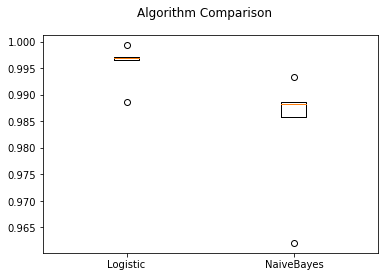

In [0]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_std, Y,cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
cov_matrix = np.cov(X_std.T)

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [0]:
eig_vals

array([1.31203911e+01, 4.30154173e+00, 1.96677612e+00, 1.69859685e+00,
       1.13998454e+00, 8.33957854e-01, 5.72703753e-01, 3.39315036e-01,
       2.49525218e-01, 1.73430451e-01, 1.53958598e-01, 1.11766687e-01,
       8.13547190e-02, 6.59942089e-02, 5.76853799e-02, 4.83493304e-02,
       4.24502630e-02, 2.75282337e-02, 2.09873321e-02, 1.80448960e-02,
       1.36162188e-04, 7.98166352e-04, 1.67178495e-03, 9.59415291e-03,
       7.47147551e-03])

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [0]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

In [0]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.38932985  69.56525746  77.41853575  84.20098222  88.75290641
  92.08287521  94.36966418  95.72453898  96.72088573  97.41338834
  98.02814042  98.47442146  98.79926842  99.06278132  99.29311732
  99.48617475  99.65567739  99.7655968   99.84939859  99.92145132
  99.95976049  99.98959387  99.99626925  99.99945631 100.        ]


In [0]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]

In [0]:
P_reduce = np.array(eigvectors_sort[0:8]).transpose()

In [0]:
# Let's project data onto 2D space
Proj_data = np.dot(X_std,P_reduce)
Proj_data.shape

(569, 8)

In [0]:
X_final=Proj_data[:500,:]
Y_final=Y[:500]
Y_true=Y[500:]
X_prod=Proj_data[500:,:]
X_final.shape,X_prod.shape

((500, 8), (69, 8))

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier



In [0]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [0]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=50)
AdaBoost=AdaBoostClassifier(n_estimators=50)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=100)
GBoost=GradientBoostingClassifier(n_estimators=100)
#stacked = VotingRegressor(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF), ('Bagged', Bagged)])

In [0]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DT',DT))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoost',AdaBoost))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))
#models.append(('VotingRegressor',stacked))

Logistic: 0.005263 (0.004676)
NaiveBayes: 0.027564 (0.028018)
KNN: 0.013343 (0.010483)
DT: 0.071468 (0.037079)
RandomForest: 0.021240 (0.017327)
Bagged: 0.017584 (0.013681)
AdaBoost: 0.014851 (0.014752)
AdaBoostRF: 0.011805 (0.009331)
GradientBoost: 0.013858 (0.009595)


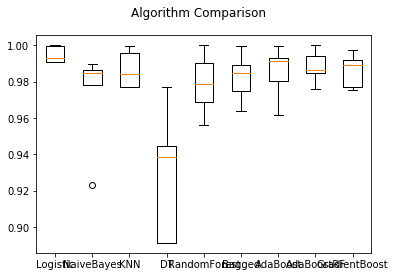

In [0]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_final, Y_final,cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
LR.fit(X_final,Y_final)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred=LR.predict(X_prod)

In [0]:
y_pred[:5]

array([1, 1, 1, 0, 0])

In [0]:
Y_true[:5]

500    1
501    1
502    1
503    0
504    0
Name: diagnosis, dtype: int64

In [0]:
Y_pred=pd.DataFrame(y_pred)

In [0]:
idx=np.arange(len(y_pred))
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68])

In [0]:
Y_pred.index=idx
Y_true.index=idx

In [0]:
from sklearn import metrics
cm=metrics.confusion_matrix(Y_pred,Y_true)
print(cm)

[[45  0]
 [ 0 24]]


Decision Tree is performing well in this dataset